**Estimar distribuciones con _python_**
-
---

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from numpy.random import normal
import matplotlib.pyplot as plt

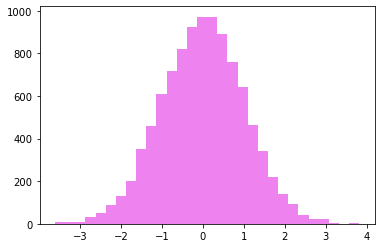

In [8]:
sample = normal(size = 10000)
plt.hist(sample, bins=30, color='violet')
plt.show()

#### **Estimación paramétrica**

Usando la función <kbd>normal</kbd> de <kbd>numpy.random</kbd> se puede generar una serie de datos aleatorios que siguen una distribución normal, el argumento <kbd>loc</kbd> es la media de la distribución y <kbd>scale</kbd> es la variación estándar

In [61]:
sample = normal(loc=50, scale=5, size=10000) 
mu = sample.mean()
sigma = sample.std()

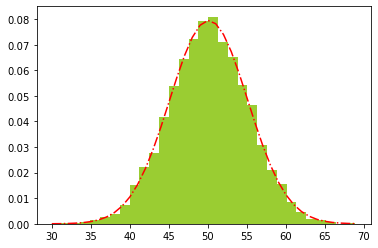

In [62]:
dist = norm(mu, sigma)
values = [i for i in range(30,70)]
probabilities = [dist.pdf(i) for i in values]
plt.hist(sample, bins=30, density=True, color='yellowgreen')
plt.plot(values, probabilities, color = 'r', linestyle='-.')
plt.show()

#### **Estimación no paramétrica**

Documentación: [sklearn - Kernel Density](https://scikit-learn.org/stable/modules/density.html)

In [34]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

In [74]:
sample1 = normal(loc=20, scale=5, size=300) 
sample2 = normal(loc=40, scale=5, size=700) 
sample = hstack((sample1, sample2))

In [75]:
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample)), 1)
model.fit(sample)
# sample

KernelDensity(bandwidth=2)

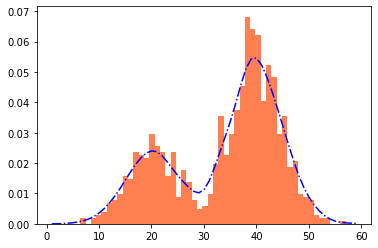

In [78]:
values = np.asarray([i for i in range(1,60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) ## probabilidad logarítmica
probabilities = np.exp(probabilities)
## Samples
plt.hist(sample, bins=50, density=True, color='coral')
## Distribucion
plt.plot(values, probabilities, color='b', linestyle='-.')

plt.show()